In [34]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import pickle
import matplotlib.pyplot as pl
import seaborn as sb
from matplotlib import rcParams
from IPython.core.display import HTML, display

In [45]:
sb.reset_defaults()
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
rcParams['figure.titlesize'] = 18
rcParams['axes.labelsize'] = 14
rcParams['axes.titlesize'] = 18
sb.set_style(style='darkgrid', rc=rcParams)

In [2]:
% matplotlib inline
display(HTML("<style>.container{width: 90% !important}</style>"))

In [4]:
with open('./PklJar/TrainSet.pkl', 'rb') as f:
    trainFrames = pickle.load(f)
dfTrainFeatures = trainFrames['features']
dfTrainLabels = trainFrames['labels']

In [5]:
del trainFrames
dfTrain = pd.concat((dfTrainFeatures, dfTrainLabels), axis=1)

In [6]:
dfTrain.head()

,SST,SSS,Rrs412,Rrs443,Rrs531,Rrs555,Rrs667,ag412,s300-600,doc
79,10.295,31.504,0.001111,0.002002,0.003704,0.003195,0.000357,0.264425,0.018833,92.925
124,28.110,20.630,0.000920,0.001744,0.004572,0.004805,0.001789,0.462229,0.017456,199.667
33,23.852,33.562,0.002381,0.002732,0.002245,0.001732,0.000199,0.090475,0.021810,94.360
86,16.690,27.010,0.001327,0.001822,0.004411,0.004402,0.001831,0.394569,0.017837,186.990
83,13.027,28.172,0.001969,0.002117,0.003812,0.003771,0.000792,0.289448,0.018627,124.139


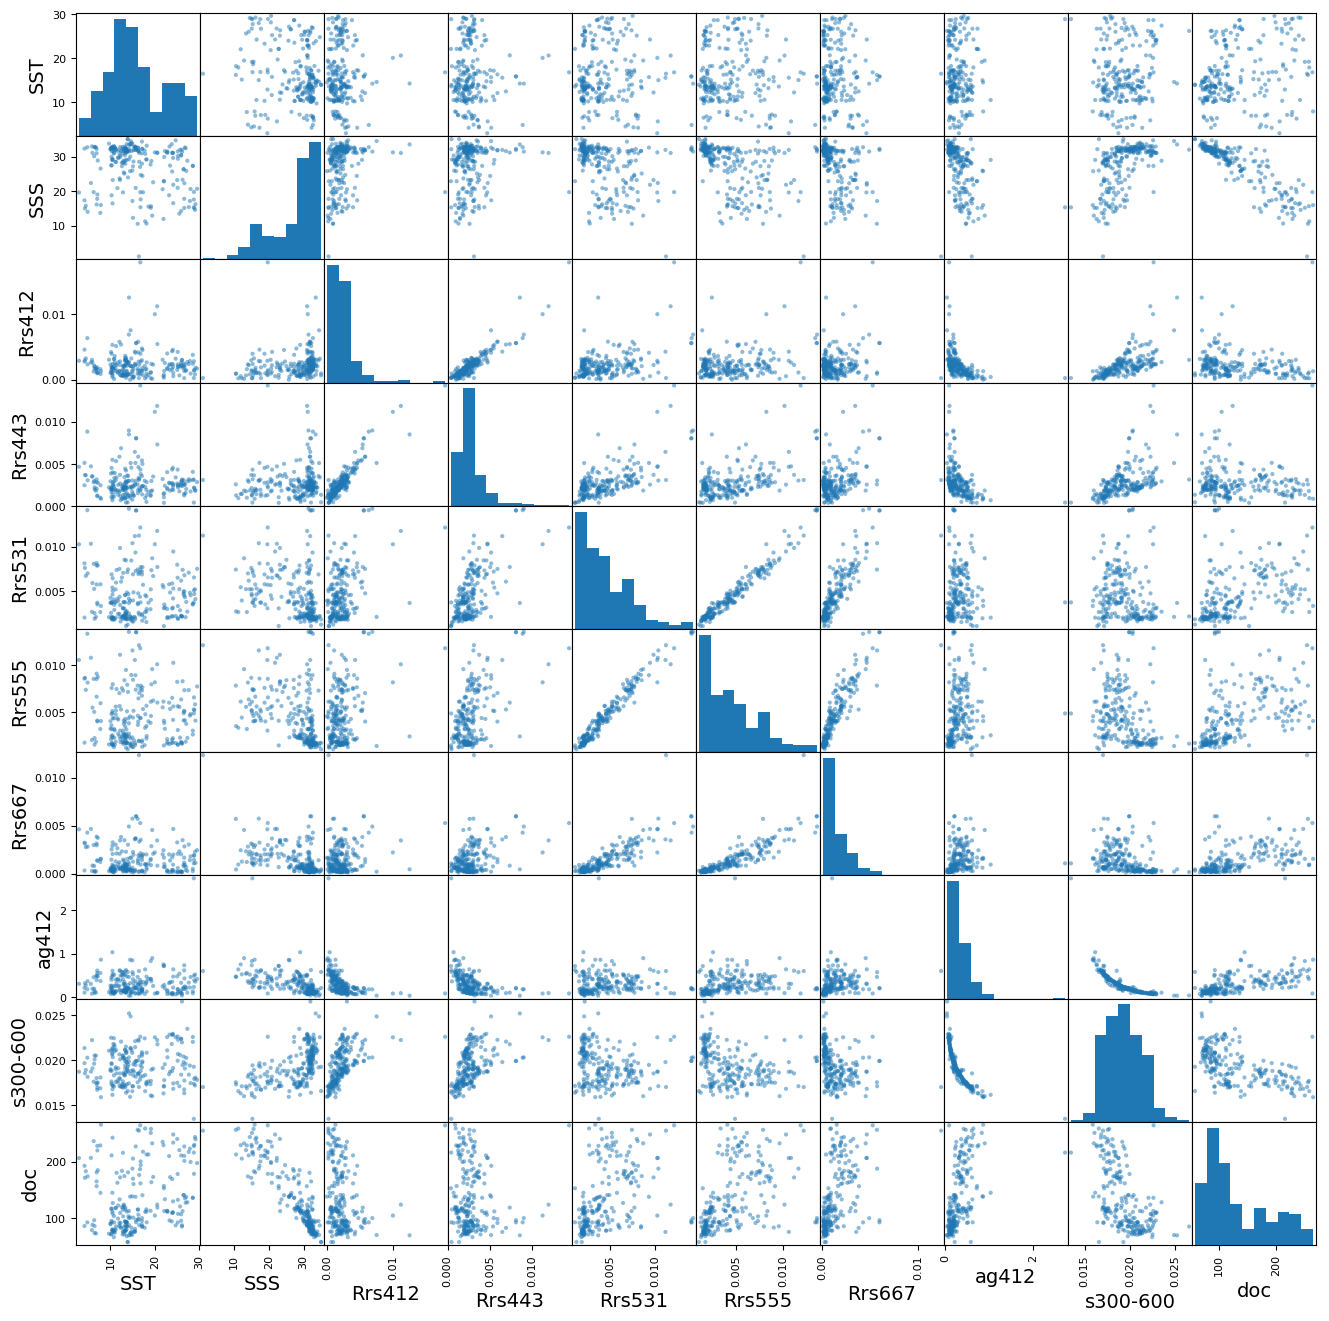

In [46]:
f, ax= pl.subplots(figsize=(16,16))
scatter_matrix(dfTrain, ax=ax);
scatter_matrix(

In [57]:
outlier1_frame = dfTrain.loc[dfTrain['s300-600'] == dfTrain['s300-600'].min()]

In [59]:
outlier2_frame = dfTrain.loc[dfTrain.ag412>2]

In [60]:
outlier2_frame

,SST,SSS,Rrs412,Rrs443,Rrs531,Rrs555,Rrs667,ag412,s300-600,doc
129,28.84,15.34,0.000242,0.000423,0.003784,0.004873,0.001066,2.734651,0.013488,216.333


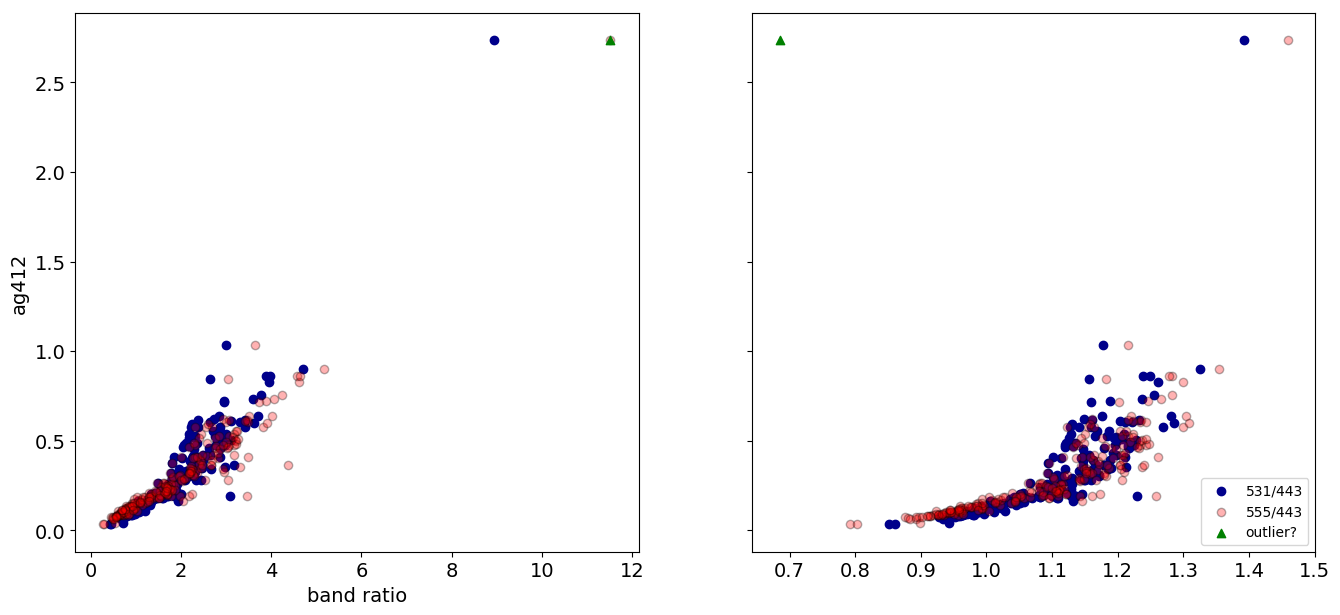

In [62]:
f, axs = pl.subplots(ncols=2, figsize=(16, 7), sharey=True)
axs[0].scatter(dfTrain.Rrs531/dfTrain.Rrs443, dfTrain.ag412, label='531/443', c='darkblue')
axs[0].scatter(dfTrain.Rrs555/dfTrain.Rrs443, dfTrain.ag412, c='r', label='555/443', alpha=0.3, edgecolor='k')
axs[0].scatter(outlier1_frame.Rrs555/outlier1_frame.Rrs443, outlier1_frame.ag412, c='g', marker='^', label='outlier?')
axs[0].set_xlabel('band ratio')
axs[0].set_ylabel('ag412')
axs[1].scatter(np.log(dfTrain.Rrs443)/np.log(dfTrain.Rrs531), dfTrain.ag412, label='531/443', c='darkblue')
axs[1].scatter(np.log(dfTrain.Rrs443)/np.log(dfTrain.Rrs555), dfTrain.ag412, c='r', label='555/443', alpha=0.3, edgecolor='k')
axs[1].scatter(np.log(outlier1_frame.Rrs555)/np.log(outlier1_frame.Rrs443), outlier1_frame.ag412, c='g', marker='^', label='outlier?')
pl.legend();

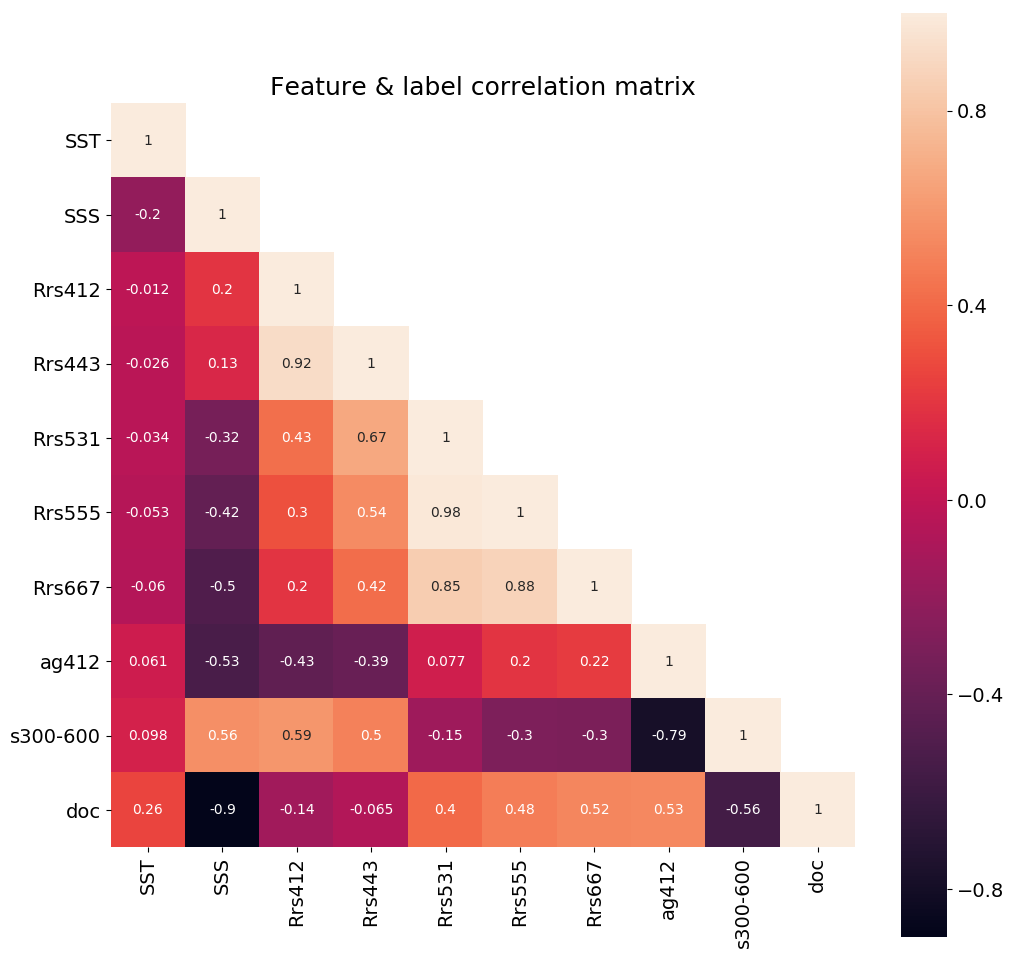

In [43]:
f, ax = pl.subplots(figsize=(12,12))
corr_matrix = dfTrain.corr()
sb.heatmap(corr_matrix, mask=np.triu(np.ones((10,10)), k=1), ax=ax, annot=True, square=True)
ax.set_title('Feature & label correlation matrix');
f.savefig('./FigJar/corrMat.png', format='png', dpi=300);

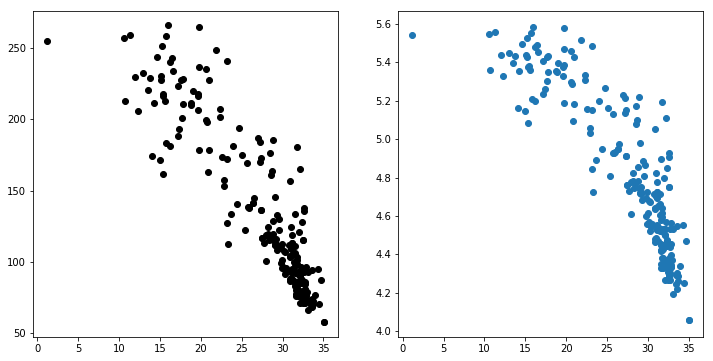

In [30]:
f,ax = pl.subplots(ncols=2, figsize=(12, 6))
ax[0].scatter(dfTrain.SSS, dfTrain.doc, c='k');
ax[1].scatter(dfTrain.SSS, np.log(dfTrain.doc))

The following features appear important:

    1. Ag_412:
        * rrs531 / rrs443
        * SSS
    2. S300_600:
        * SSS
        * Rrs412, 443
        * ag412(!)
    3. doc:
        * SSS
        * Rrs555, 667

TODO

Create new feature based on ratio
    * Rrs(531) / Rrs(443)
Some of the features may need to be dropped:
    * Rrs(555) -> collinear to Rrs(531) (98%, pearson's r)
    * Rrs(412) -> collinear to Rrs(443) (92%, pearson's r)
    
Divide training set into three sets, each with one of the target data (ag412, S300_600, doc)

Write all transformations into functions to re-call/reuse on test set, new training data, etc.